Pokemons with spawn rate less than 5%:
           name  spawn_chance
0     Bulbasaur        0.6900
1       Ivysaur        0.0420
2      Venusaur        0.0170
3    Charmander        0.2530
4    Charmeleon        0.0120
..          ...           ...
146     Dratini        0.3000
147   Dragonair        0.0200
148   Dragonite        0.0011
149      Mewtwo        0.0000
150         Mew        0.0000

[147 rows x 2 columns]
Pokemons with less than 4 weaknesses:
Empty DataFrame
Columns: [name, weaknesses]
Index: []
Pokemons with no multipliers:
131       Ditto
143    Articuno
144      Zapdos
145     Moltres
149      Mewtwo
150         Mew
Name: name, dtype: object
Pokemons with less than 2 evolutions:
                   name              next_evolution
0             Bulbasaur           Ivysaur, Venusaur
3            Charmander       Charmeleon, Charizard
6              Squirtle        Wartortle, Blastoise
9              Caterpie         Metapod, Butterfree
12               Weedle            

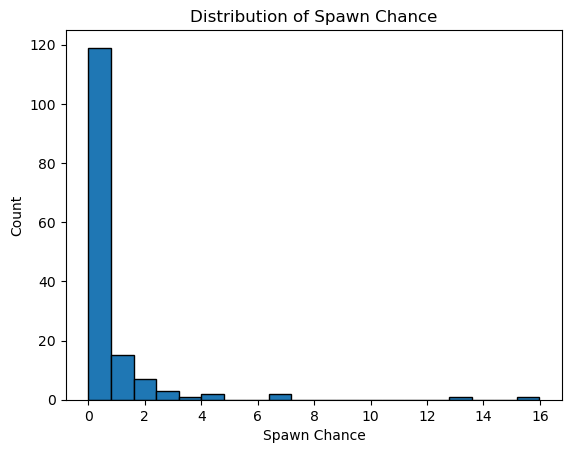

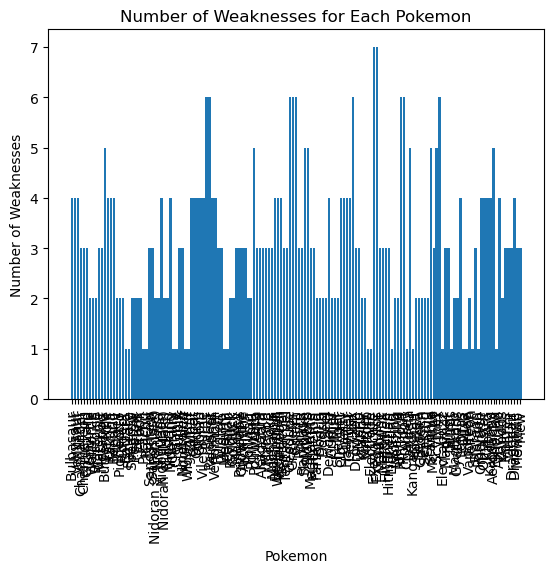

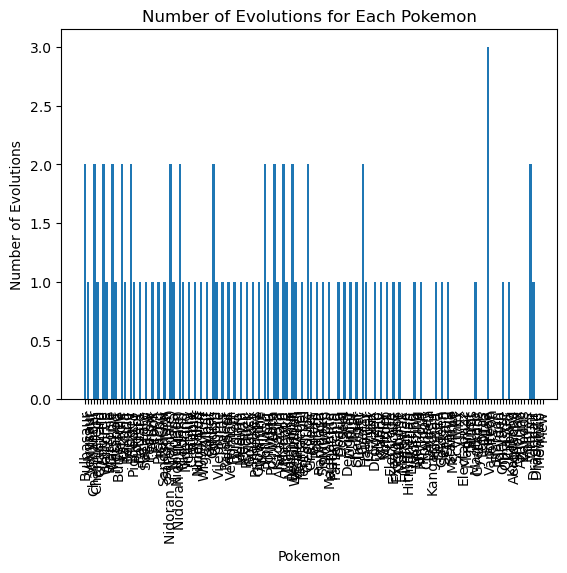

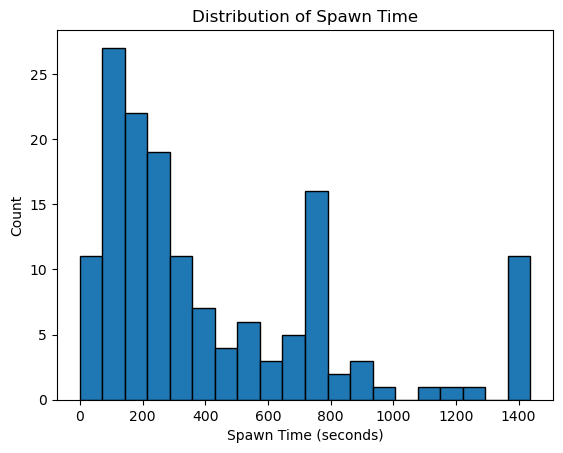

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the data from the Excel file
df = pd.read_excel("pokemon_data.xlsx")

# Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df["spawn_chance"] < 5]
print("Pokemons with spawn rate less than 5%:")
print(spawn_rate_less_than_5[["name", "spawn_chance"]])

# Get all Pokemons that have less than 4 weaknesses
less_than_4_weaknesses = df[df["weaknesses"].str.len() < 4]
print("Pokemons with less than 4 weaknesses:")
print(less_than_4_weaknesses[["name", "weaknesses"]])

# Get all Pokemons that have no multipliers at all
no_multipliers = df[df["spawn_time"].isnull()]
print("Pokemons with no multipliers:")
print(no_multipliers["name"])

# Get all Pokemons that do not have more than 2 evolutions
less_than_2_evolutions = df[df["next_evolution"].notnull() & df["next_evolution"].str.contains(",")]
print("Pokemons with less than 2 evolutions:")
print(less_than_2_evolutions[["name", "next_evolution"]])

# Get all Pokemons whose spawn time is less than 300 seconds
def convert_spawn_time(spawn_time):
    if isinstance(spawn_time, float) and np.isnan(spawn_time):  # Check if the value is NaN
        return -1  # Return -1 as a default value for NaN
    if isinstance(spawn_time, float):  # Check if the value is float
        spawn_time = str(int(spawn_time))  # Convert float to integer and then to string
    minutes, seconds = map(int, spawn_time.split(":"))
    return minutes * 60 + seconds

df["spawn_time_seconds"] = df["spawn_time"].apply(convert_spawn_time)
spawn_time_less_than_300 = df[df["spawn_time_seconds"] < 300]
print("Pokemons with spawn time less than 300 seconds:")
print(spawn_time_less_than_300[["name", "spawn_time"]])

# Get all Pokemon who have more than two types of capabilities
more_than_2_types = df[df["type"].str.count(",") > 1]
print("Pokemons with more than two types of capabilities:")
print(more_than_2_types[["name", "type"]])

# Step 2: Plotting for better visualizations

# Plotting the distribution of spawn chance
plt.hist(df["spawn_chance"], bins=20, edgecolor="black")
plt.xlabel("Spawn Chance")
plt.ylabel("Count")
plt.title("Distribution of Spawn Chance")
plt.show()

# Plotting the number of weaknesses
df["num_weaknesses"] = df["weaknesses"].str.count(",") + 1
plt.bar(df["name"], df["num_weaknesses"])
plt.xlabel("Pokemon")
plt.ylabel("Number of Weaknesses")
plt.title("Number of Weaknesses for Each Pokemon")
plt.xticks(rotation=90)
plt.show()

# Plotting the number of evolutions
df["num_evolutions"] = df["next_evolution"].str.count(",") + 1
plt.bar(df["name"], df["num_evolutions"])
plt.xlabel("Pokemon")
plt.ylabel("Number of Evolutions")
plt.title("Number of Evolutions for Each Pokemon")
plt.xticks(rotation=90)
plt.show()

# Plotting the spawn time in seconds
plt.hist(df["spawn_time_seconds"], bins=20, edgecolor="black")
plt.xlabel("Spawn Time (seconds)")
plt.ylabel("Count")
plt.title("Distribution of Spawn Time")
plt.show()
